In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [143]:
df_listings = pd.read_csv('listings.csv')
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7566 non-null   int64  
 1   listing_url                                   7566 non-null   object 
 2   scrape_id                                     7566 non-null   int64  
 3   last_scraped                                  7566 non-null   object 
 4   source                                        7566 non-null   object 
 5   name                                          7566 non-null   object 
 6   description                                   7411 non-null   object 
 7   neighborhood_overview                         4194 non-null   object 
 8   picture_url                                   7566 non-null   object 
 9   host_id                                       7566 non-null   i

In [144]:
df_reviews = pd.read_csv('reviews.csv')
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243183 entries, 0 to 243182
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     243183 non-null  int64 
 1   id             243183 non-null  int64 
 2   date           243183 non-null  object
 3   reviewer_id    243183 non-null  int64 
 4   reviewer_name  243183 non-null  object
 5   comments       243165 non-null  object
dtypes: int64(3), object(3)
memory usage: 11.1+ MB


In [145]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,44077,203703,2011-03-20,393348,Christian,We enjoyed our stay very much. The room was co...
1,44077,211369,2011-03-28,444004,Solidea,We have been here 4 nights. Stay in a home is ...
2,44077,234215,2011-04-21,465058,Michael And Isabelle,Teresa and Hughie were great hosts. They were ...
3,44077,261843,2011-05-13,490005,Weston,"No surprises, was as described. Very gracious..."
4,44077,268148,2011-05-17,520460,Barbara,"Teresa was a lovely hostess, and we had a deli..."


In [146]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20220911231053,2022-09-12,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,...,4.93,4.66,4.82,NaN,f,2,0,2,0,1.85
1,85156,https://www.airbnb.com/rooms/85156,20220911231053,2022-09-12,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,...,4.88,4.64,4.78,NaN,f,2,0,2,0,1.53
2,159889,https://www.airbnb.com/rooms/159889,20220911231053,2022-09-12,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,766611,...,4.90,4.63,4.74,NaN,f,3,0,3,0,2.78
3,162809,https://www.airbnb.com/rooms/162809,20220911231053,2022-09-11,city scrape,5.5 miles south of Dublin City :^),A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - vi...",https://a0.muscache.com/pictures/86694529/c07b...,777681,...,4.97,4.77,4.85,NaN,f,2,0,2,0,3.68
4,165828,https://www.airbnb.com/rooms/165828,20220911231053,2022-09-11,city scrape,Pádraig Pearse apt. Kilmainham,"Don't just visit Dublin, experience Dublin in ...","Enjoy a walk along the grand canal, or just ob...",https://a0.muscache.com/pictures/34311419/b3f6...,790601,...,4.75,4.34,4.55,NaN,t,5,5,0,0,0.48


# Remove all columns from listings beside the id and the r_rating

In [147]:
features_to_keep = ["id", "review_scores_rating"]
features_to_drop = list(df_listings.drop(features_to_keep, axis=1))

In [148]:
listings_cleaned = df_listings.drop(features_to_drop, axis=1)

In [149]:
features_to_keep = ["listing_id", "comments"]
features_to_drop = list(df_reviews.drop(features_to_keep, axis=1))


In [150]:
reviews_cleaned = df_reviews.drop(features_to_drop, axis=1)

In [151]:
print(reviews_cleaned.head())
print(listings_cleaned.head())

   listing_id                                           comments
0       44077  We enjoyed our stay very much. The room was co...
1       44077  We have been here 4 nights. Stay in a home is ...
2       44077  Teresa and Hughie were great hosts. They were ...
3       44077  No surprises, was as described.  Very gracious...
4       44077  Teresa was a lovely hostess, and we had a deli...
       id  review_scores_rating
0   44077                  4.78
1   85156                  4.79
2  159889                  4.74
3  162809                  4.84
4  165828                  4.63


In [152]:
df_merged = listings_cleaned.merge(reviews_cleaned, left_on="id", right_on="listing_id")

In [153]:
df_merged.head()

,id,review_scores_rating,listing_id,comments
0,44077,4.78,44077,We enjoyed our stay very much. The room was co...
1,44077,4.78,44077,We have been here 4 nights. Stay in a home is ...
2,44077,4.78,44077,Teresa and Hughie were great hosts. They were ...
3,44077,4.78,44077,"No surprises, was as described. Very gracious..."
4,44077,4.78,44077,"Teresa was a lovely hostess, and we had a deli..."


In [154]:
df_merged_cleaned =  df_merged.drop(['id', 'listing_id'], axis=1)
df_merged_cleaned.head()

,review_scores_rating,comments
0,4.78,We enjoyed our stay very much. The room was co...
1,4.78,We have been here 4 nights. Stay in a home is ...
2,4.78,Teresa and Hughie were great hosts. They were ...
3,4.78,"No surprises, was as described. Very gracious..."
4,4.78,"Teresa was a lovely hostess, and we had a deli..."


In [155]:
df_merged_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243183 entries, 0 to 243182
Data columns (total 2 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   review_scores_rating  243183 non-null  float64
 1   comments              243165 non-null  object 
dtypes: float64(1), object(1)
memory usage: 5.6+ MB


# replace the actual rating with categories 

In [156]:
df_merged_cleaned["rating_category"] = pd.cut(df_merged_cleaned["review_scores_rating"],
                      bins=[0., 4.3, 4.6, 4.8, 4.9, 5],
                      labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

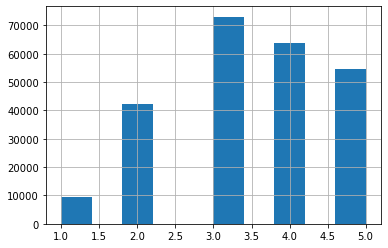

In [157]:
df_merged_cleaned["rating_category"].hist()

In [158]:
df_merged_cleaned = df_merged_cleaned.drop(['review_scores_rating'], axis=1)

In [159]:
df_merged_cleaned.dropna(inplace=True)

In [160]:
print(df_merged_cleaned)


                                                 comments rating_category
0       We enjoyed our stay very much. The room was co...               3
1       We have been here 4 nights. Stay in a home is ...               3
2       Teresa and Hughie were great hosts. They were ...               3
3       No surprises, was as described.  Very gracious...               3
4       Teresa was a lovely hostess, and we had a deli...               3
...                                                   ...             ...
243178  What a great host couple and great spot. Super...               5
243179  Ana is a lovey host .<br/>There was an issue a...               5
243180  We had a fantastic stay house was perfect had ...               5
243181  best airbnb host ever. very humble and very he...               5
243182  Noel is a great host and the room is very clea...               5

[243026 rows x 2 columns]


In [165]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_merged_cleaned, df_merged_cleaned["rating_category"]):
    strat_train_set = df_merged_cleaned.iloc[train_index]
    strat_test_set = df_merged_cleaned.iloc[test_index]

In [166]:
strat_train_set.value_counts()

,comments,rating_category
135890,"La estancia ha sido de 10, la limpieza impecab...",3
239898,"Robert is an excelent host, who was always ava...",5
105455,My fiance and I booked Elena's place for ourse...,4
19032,I made the reservation for my uncles and they ...,2
153857,We spent three nights in Dublin and really had...,5


In [168]:
strat_train_set["rating_category"].value_counts() / len(strat_train_set)

3    0.300494
4    0.262555
5    0.225285
2    0.173223
1    0.038443
Name: rating_category, dtype: float64

In [169]:
strat_test_set["rating_category"].value_counts() / len(strat_test_set)

3    0.300498
4    0.262540
5    0.225281
2    0.173230
1    0.038452
Name: rating_category, dtype: float64

# Export dataset to csv file

In [170]:
strat_test_set.to_csv('test_reviews_data')
strat_train_set.to_csv('train_reviews_data')